# Principal Component Analysis (PCA)  - BRICS Tutorial

1. Introduction

Principal Component Analysis (PCA) is a powerful dimensionality reduction technique widely used in astronomy to:

    Identify patterns in high-dimensional datasets (e.g., spectra, images, catalogs).

    Remove noise or instrumental effects.

    Visualize complex data in lower dimensions.

In this tutorial, we will apply PCA to an example dataset of galaxy spectra.

2. Setup

First, let’s import the necessary Python libraries.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from astropy.utils.data import download_file
from astropy.io import fits

3. Loading Astronomical Data

We’ll use galaxy spectra from the Sloan Digital Sky Survey (SDSS) as an example.

In [32]:
# Download an example SDSS spectrum FITS file
sdss_url = "https://dr12.sdss.org/sas/dr12/sdss/spectro/redux/26/spectra/1323/spec-1323-52797-0012.fits"
file_path = download_file(sdss_url, cache=True, show_progress=True)

# Open the FITS file and extract wavelength and flux
with fits.open(file_path) as hdul:
    flux = hdul[1].data['flux']  # Flux array
    wavelength = 10 ** hdul[1].data['loglam']  # Wavelength in Angstroms

3. Loading Astronomical Data

We’ll use galaxy spectra from the Sloan Digital Sky Survey (SDSS) as an example.

# Download an example SDSS spectrum FITS file
sdss_url = "https://dr12.sdss.org/sas/dr12/sdss/spectro/redux/26/spectra/1323/spec-1323-52797-0012.fits"
file_path = download_file(sdss_url, cache=True, show_progress=True)

# Open the FITS file and extract wavelength and flux
with fits.open(file_path) as hdul:
    flux = hdul[1].data['flux']  # Flux array
    wavelength = 10 ** hdul[1].data['loglam']  # Wavelength in Angstroms

4. Preprocessing the Data

PCA requires standardized data (mean=0, variance=1).

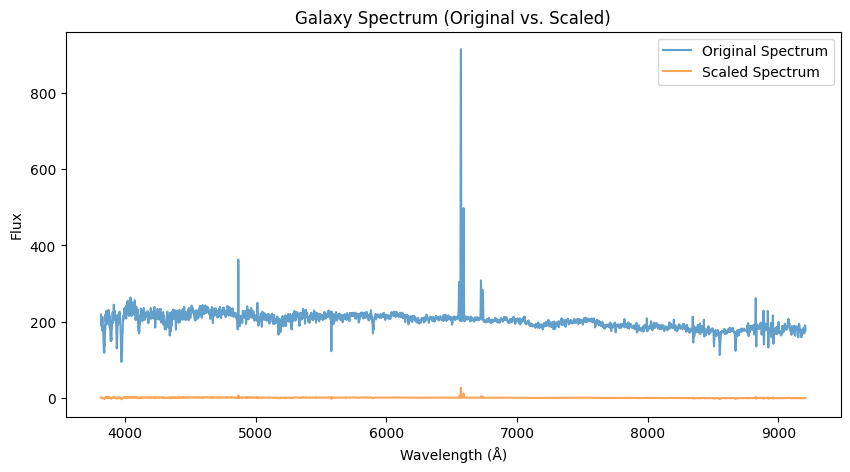

In [37]:
# Standardize the flux (important for PCA)
scaler = StandardScaler()
flux_scaled = scaler.fit_transform(flux.reshape(-1, 1)).flatten()

# Plot the original and scaled spectrum
plt.figure(figsize=(10, 5))
plt.plot(wavelength, flux, label="Original Spectrum", alpha=0.7)
plt.plot(wavelength, flux_scaled, label="Scaled Spectrum", alpha=0.7)
plt.xlabel("Wavelength (Å)")
plt.ylabel("Flux")
plt.legend()
plt.title("Galaxy Spectrum (Original vs. Scaled)")
plt.show()

5. Applying PCA

Now, let’s apply PCA to a set of multiple spectra (for simplicity, we’ll simulate a small dataset).

In [49]:
# Simulate a dataset of 10 spectra with some noise and variations
np.random.seed(42)
n_spectra = 10
spectra = np.zeros((n_spectra, len(flux)))
for i in range(n_spectra):
    spectra[i] = flux + np.random.normal(0, 0.5, len(flux))  # Add noise

# Standardize the dataset
spectra_scaled = StandardScaler().fit_transform(spectra)

# Apply PCA
pca = PCA(n_components=2)  # Keep the top 3 principal components
pca_result = pca.fit_transform(spectra_scaled)

# Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.12198097 0.11690865]


6. Visualizing PCA Results
6.1 PCA Components (Eigenspectra)

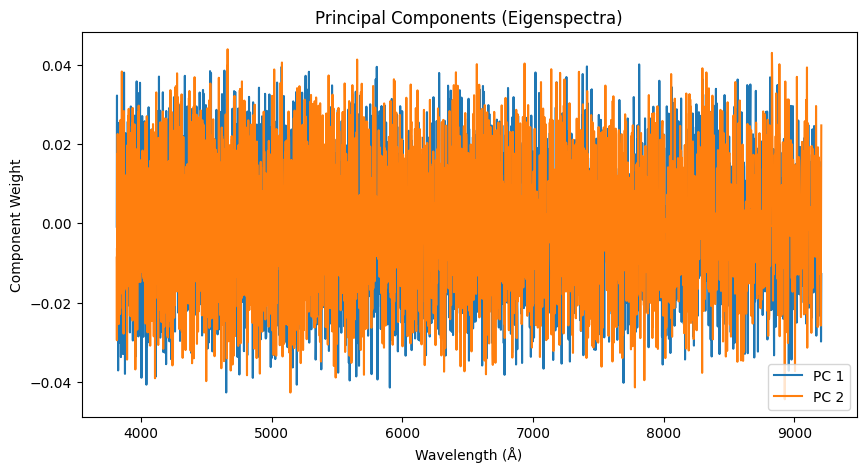

In [54]:
plt.figure(figsize=(10, 5))
for i in range(2):
    plt.plot(wavelength, pca.components_[i], label=f"PC {i+1}")
plt.xlabel("Wavelength (Å)")
plt.ylabel("Component Weight")
plt.legend()
plt.title("Principal Components (Eigenspectra)")
plt.show()

6.2 Projection of Data in PCA Space

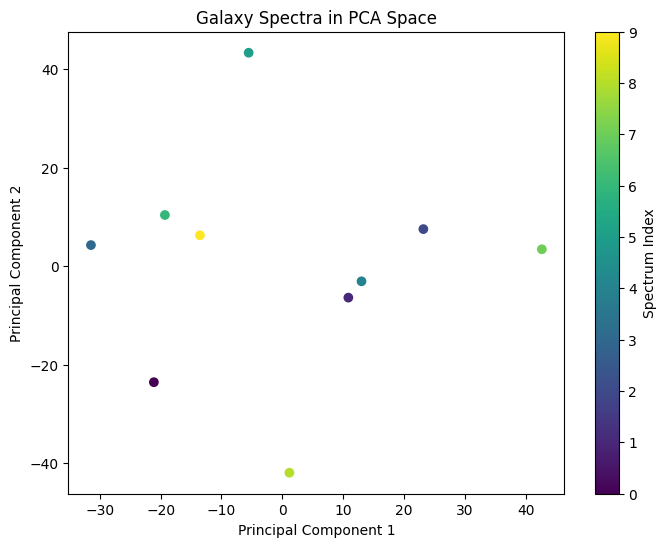

In [47]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=range(n_spectra), cmap='viridis')
plt.colorbar(label="Spectrum Index")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Galaxy Spectra in PCA Space")
plt.show()

7. Interpretation

    PC1 often captures the dominant continuum shape.

    PC2 and PC3 may correspond to emission/absorption features.

    The scatter plot helps identify outliers or clusters in the dataset.

8. Applications in Astronomy

PCA is used in:

    Spectral Classification (e.g., stars, galaxies, quasars).

    Noise Reduction (e.g., removing sky lines).

    Feature Extraction (e.g., identifying important spectral lines).

9. Exercises for Practice

    Try on Real Data: Download more SDSS spectra and apply PCA.

    Reconstruction: Reconstruct spectra using only the top 2 PCs.

    Other Datasets: Apply PCA to photometric data (e.g., galaxy colors).

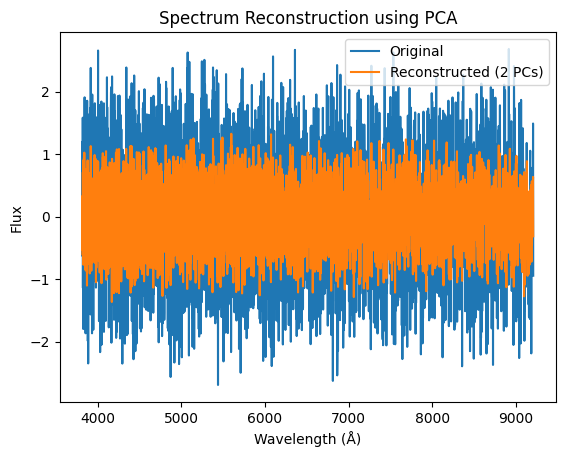

In [23]:
# Example: Reconstructing a spectrum using 2 PCs
pca_2d = PCA(n_components=2)
reconstructed = pca_2d.inverse_transform(pca_2d.fit_transform(spectra_scaled))

plt.plot(wavelength, spectra_scaled[0], label="Original")
plt.plot(wavelength, reconstructed[0], label="Reconstructed (2 PCs)")
plt.legend()
plt.xlabel("Wavelength (Å)")
plt.ylabel("Flux")
plt.title("Spectrum Reconstruction using PCA")
plt.show()

10. Conclusion

PCA is a valuable tool for astronomers working with high-dimensional data. This tutorial covered:

    Standardizing data.

    Computing principal components.

    Visualizing results.

Try applying PCA to your own datasets!


Further Reading:

    Scikit-learn PCA Documentation

    AstroML: PCA for Spectral Analysis